In [58]:
#imports
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import matplotlib.pyplot as plt
import psycopg2
import psycopg2.extras
import pyproj
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import folium
import folium.features as ftr
import shapely
import shapely.wkt
import shapely.ops as ops
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
#connecting to the server
try:
    conn = psycopg2.connect("dbname='spatial' user='postgres' host='localhost' password='Zubaz11234'")
except:
    print("cant connect to the database")
    
cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)    

In [3]:
#creating data frame for 5 parcels
sql  = "".join([
    "select parid, luc, luc_desc, ",
    "aprland, aprbldg, aprtot, ",
    "nbhd, sale_date, price, ",
    "zip1, rmbed, sfla, total_area, ",
    "yrblt, misc_area, months_since_sale, ",
    "ST_AsText(geom) as wkt ",
    "from volusia.sales_analysis where ",
    "rmbed=3 and ",
    "luc_desc ilike 'Single Family' and ",
#used Daytona Beach and Daytona Beach Shores zip code 
    "(zip1 ilike'32114' or zip1 ilike '32118') and ",
    "geom is not null and ",
    "rmbed is not null and ",
    "price<300000 ",
    ";"
    ]);

df = pd.read_sql_query(sql, conn)
df.head()

,parid,luc,luc_desc,aprland,aprbldg,aprtot,nbhd,sale_date,price,zip1,rmbed,sfla,total_area,yrblt,misc_area,months_since_sale,wkt
0,3286511.0,0100,Single Family,9153.0,68927.0,78080.0,2274,2019-03-27,85000.0,32114,3.0,1080.0,1388.0,1941.0,0.0,25,MULTIPOLYGON(((644069.7280000001 1770927.63199...
1,3525680.0,0100,Single Family,12722.0,44256.0,56978.0,3457,2018-02-02,64000.0,32114,3.0,1650.0,2477.0,1930.0,0.0,39,MULTIPOLYGON(((651362.4470000006 1768816.85499...
2,3272722.0,0100,Single Family,11375.0,103341.0,114716.0,2174,2019-08-30,141000.0,32114,3.0,1394.0,1767.0,1956.0,0.0,20,MULTIPOLYGON(((637669.5650000013 1774248.08600...
3,3405366.0,0100,Single Family,48078.0,83321.0,131399.0,3089,2018-06-25,159900.0,32118,3.0,1106.0,1637.0,1956.0,0.0,34,MULTIPOLYGON(((655658.4662499987 1772442.98499...
4,3099745.0,0100,Single Family,56228.0,165711.0,221939.0,2262,2018-11-16,269000.0,32118,3.0,1195.0,2469.0,1946.0,0.0,30,MULTIPOLYGON(((646594.8999999985 1790180.51500...


In [4]:
#cleaning the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   parid              745 non-null    float64
 1   luc                745 non-null    object 
 2   luc_desc           745 non-null    object 
 3   aprland            745 non-null    float64
 4   aprbldg            745 non-null    float64
 5   aprtot             745 non-null    float64
 6   nbhd               745 non-null    object 
 7   sale_date          745 non-null    object 
 8   price              745 non-null    float64
 9   zip1               745 non-null    object 
 10  rmbed              745 non-null    float64
 11  sfla               745 non-null    float64
 12  total_area         745 non-null    float64
 13  yrblt              745 non-null    float64
 14  misc_area          745 non-null    float64
 15  months_since_sale  745 non-null    int64  
 16  wkt                745 non

In [5]:
#printing the dataframe for visualization
corr = df.corr()
print(corr)

                      parid   aprland   aprbldg    aprtot     price  rmbed  \
parid              1.000000 -0.023158  0.244460  0.176002  0.141701    NaN   
aprland           -0.023158  1.000000  0.427744  0.728210  0.688998    NaN   
aprbldg            0.244460  0.427744  1.000000  0.930979  0.794046    NaN   
aprtot             0.176002  0.728210  0.930979  1.000000  0.880338    NaN   
price              0.141701  0.688998  0.794046  0.880338  1.000000    NaN   
rmbed                   NaN       NaN       NaN       NaN       NaN    NaN   
sfla               0.323932  0.354501  0.659747  0.643411  0.558819    NaN   
total_area         0.229141  0.422439  0.691581  0.694987  0.621690    NaN   
yrblt              0.489427 -0.108641  0.410779  0.267582  0.194520    NaN   
misc_area         -0.047680  0.118060  0.203120  0.201692  0.180854    NaN   
months_since_sale -0.004118  0.067929  0.074709  0.084081 -0.168628    NaN   

                       sfla  total_area     yrblt  misc_area  \

In [6]:
#printing the correlations to price
print (df.corr().abs().nlargest(4, 'price').index)


Index(['price', 'aprtot', 'aprbldg', 'aprland'], dtype='object')


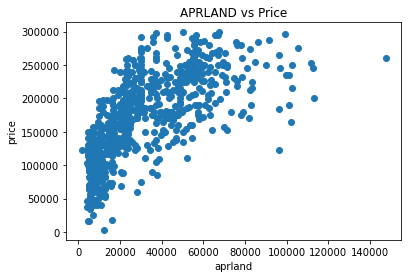

In [7]:
#creating the scatter plot for first correlation
plt.scatter(df['aprland'], df['price'], marker='o')
plt.xlabel('aprland')
plt.ylabel('price')
plt.title("APRLAND vs Price")
plt.show()

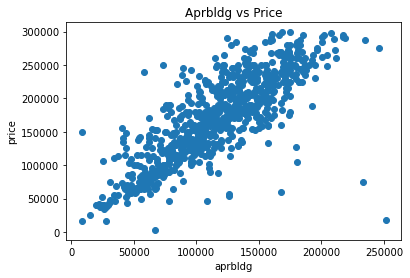

In [60]:
#creating the scatter plot for the second correlation
plt.scatter(df['aprbldg'], df['price'], marker='o')
plt.xlabel('aprbldg')
plt.ylabel('price')
plt.title("Aprbldg vs Price")
plt.show()

In [63]:
#training the model for the top correlations from sales_analysis (prior to feature addition)
x = pd.DataFrame(np.c_[df['aprland'], df['aprbldg']], columns= ['aprland','aprbldg'])
y = df['price']
x_train, x_test, Y_train, Y_test =  train_test_split(x, y, test_size = 0.3, random_state=5)
model = LinearRegression()
model.fit(x_train, Y_train)


LinearRegression()

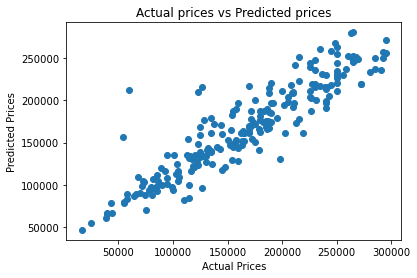

In [64]:
#printing the model for Actual prices vs Predicted prices
price_pred = model.predict(x_test)
plt.scatter(Y_test, price_pred, marker='o')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title("Actual prices vs Predicted prices")
plt.show()

In [65]:
#calculating the R-Squared value and error
print('R-squared: %.4f'%model.score(x_test, Y_test))
mse = mean_squared_error(Y_test, price_pred)
print(mse, np.round(np.sqrt(mse),1))
print('Build your price = B0 + B1X1 + B2X2 +...')
print(model.intercept_)
print(model.coef_)

R-squared: 0.8259
752963725.731655 27440.2
Build your price = B0 + B1X1 + B2X2 +...
34066.92395921008
[1.16456537 0.86577229]


In [66]:
#getting the zillow difference 
def zillowDiff(dataframe, ml, columns):
    zillowID1 = dataframe.loc[dataframe['parid'] == 4811435]

    zillowID2 = dataframe.loc[dataframe['parid'] == 3446445]

    zillowID3 = dataframe.loc[dataframe['parid'] == 3248694]

    zillowID4 = dataframe.loc[dataframe['parid'] == 3381211]

    zillowID5 = dataframe.loc[dataframe['parid'] == 3096045]

    zillowIDs =    [zillowID1,    zillowID2,     zillowID3,     zillowID4,     zillowID5]
    zillowPrices =  [241200,      165000,        224990,       155000,             299000]

    print("DIFFERENCES FROM ZILLOW PRICES")
    # multi family parid=3521706 or parid=3524047

    for i in range(len(zillowIDs)):
        print("For parid {0}: ".format(zillowIDs[i]['parid'].item()), round(float(abs(((ml.predict(zillowIDs[i][columns])) - zillowPrices[i]))/zillowPrices[i] * 100), 2), '%')

zillowDiff(df, model, ['aprland','aprbldg'])

DIFFERENCES FROM ZILLOW PRICES
For parid 4811435.0:  10.84 %
For parid 3446445.0:  8.32 %
For parid 3248694.0:  23.11 %
For parid 3381211.0:  17.15 %
For parid 3096045.0:  31.88 %


In [13]:
#generating map view
pMap = folium.Map(location=[29.1887876219045, -81.0494807582431], zoom_start=10, width="100%")

def highlightFunction(feature):  
    return
    {
        'weight': 3,
        'color': '#FF0000',
        'dashArray': '',
        'fillOpacity': 0.5
    };

def styleFunction(feature): 
    return
    {
        'weight': 1.5,
        #'color': 'blue',
        'dashArray': '5, 5',
        'fillOpacity': 0.7
    };

pLayer = folium.FeatureGroup(name="Parcels")
lLayer = folium.FeatureGroup(name="Prices")

zillowPIDs = [4811435, 3446445, 3248694, 3381211, 3096045]

for index, row in df.iterrows():    

    if (row.parid not in zillowPIDs):
        continue

    tooltip_show = 'Price: ' + str(int(row.price))
    geom = shapely.wkt.loads(row.wkt)
    wgs_geom = ops.transform(pyproj.Transformer.from_crs(pyproj.CRS('EPSG:2236'), pyproj.CRS('EPSG:4326'), always_xy=True) .transform, geom)
    
    parcel_json= folium.GeoJson(shapely.geometry.asShape(wgs_geom),
                       name='Parcels',
                       overlay=True,
                       #style_function=style_function,
                       #highlight_function=highlight_function,
                       tooltip=tooltip_show 
    )
    
    popup_string = '<table>'

    for i, v in row.iteritems():
        popup_string += "<tr><td>%10s</td><td>&nbsp;" % i.title() + " " + str(v) + "</td></tr>\n"

    popup_string += "</table>"
    folium.Popup(popup_string).add_to(parcel_json)
    
    pLayer.add_child(parcel_json)
    
    divlabel = '<div style="font-size: 14pt; color : black">' + tooltip_show + '</div>'
    marker = folium.Marker(
        [wgs_geom.centroid.y, wgs_geom.centroid.x], 
        icon=ftr.DivIcon(html=divlabel)
    ).add_to(lLayer)

pLayer.add_to(pMap)
lLayer.add_to(pMap)

pMap.add_child(folium.LayerControl(position='topright', collapsed=False))

pMap.fit_bounds(pLayer.get_bounds())

pMap

In [14]:
#adding my contribution to the database: flood zone distance(fzdistance) and flood zone id(fzid)
sql1  = "".join([
    "select parid, luc, luc_desc, ",
    "aprland, aprbldg, aprtot, ",
    "nbhd, sale_date, price, ",
    "zip1, rmbed, sfla, total_area, ",
    "yrblt, misc_area, months_since_sale, ",
    "ST_AsText(geom) as wkt, fzdistance, fzid ",
    "from volusia.sales_analysis where ",
    "rmbed=3 and ",
    "luc_desc ilike 'Single Family' and ",
#used Daytona Beach and Daytona Beach Shores zip code 
    "(zip1 ilike'32114' or zip1 ilike '32118') and ",
    "geom is not null and ",
    "rmbed is not null and ",
    "price<300000 ",
    ";"
    ]);

df = pd.read_sql_query(sql1, conn)

In [15]:
#refinding the correlations to price with included database attribute
corr = df.corr()
print(corr)

print (df.corr().abs().nlargest(4, 'price').index)

                      parid   aprland   aprbldg    aprtot     price  rmbed  \
parid              1.000000 -0.023158  0.244460  0.176002  0.141701    NaN   
aprland           -0.023158  1.000000  0.427744  0.728210  0.688998    NaN   
aprbldg            0.244460  0.427744  1.000000  0.930979  0.794046    NaN   
aprtot             0.176002  0.728210  0.930979  1.000000  0.880338    NaN   
price              0.141701  0.688998  0.794046  0.880338  1.000000    NaN   
rmbed                   NaN       NaN       NaN       NaN       NaN    NaN   
sfla               0.323932  0.354501  0.659747  0.643411  0.558819    NaN   
total_area         0.229141  0.422439  0.691581  0.694987  0.621690    NaN   
yrblt              0.489427 -0.108641  0.410779  0.267582  0.194520    NaN   
misc_area         -0.047680  0.118060  0.203120  0.201692  0.180854    NaN   
months_since_sale -0.004118  0.067929  0.074709  0.084081 -0.168628    NaN   
fzdistance        -0.357767  0.284709  0.032590  0.139701  0.122

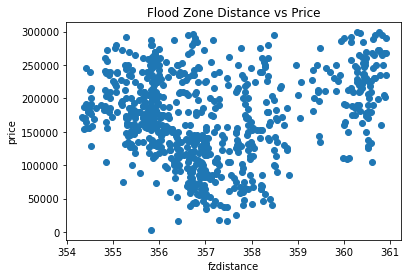

In [16]:
#generating scatter plot to view relationship between fzdistance
plt.scatter(df['fzdistance'], df['price'], marker='o')
plt.xlabel('fzdistance')
plt.ylabel('price')
plt.title("Flood Zone Distance vs Price")
plt.show()

In [17]:
#training the model to include fzdistance and price
xColumns = ['fzdistance','aprland','aprbldg']
x = pd.DataFrame(np.c_[df['fzdistance'], df['aprland'], df['aprbldg']], columns= xColumns)
y = df['price']
x_train, x_test, Y_train, Y_test =  train_test_split(x, y, test_size = 0.3, random_state=5)

model = LinearRegression()
model.fit(x_train, Y_train)

LinearRegression()

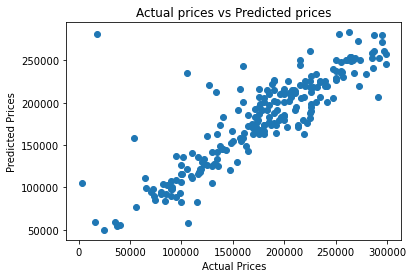

DIFFERENCES FROM ZILLOW PRICES
For parid 4811435.0:  8.95 %
For parid 3446445.0:  6.88 %
For parid 3248694.0:  21.43 %
For parid 3381211.0:  20.3 %
For parid 3096045.0:  32.88 %


In [18]:
#creating the model and displaying difference with zillow price
price_pred = model.predict(x_test)
plt.scatter(Y_test, price_pred, marker='o')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title("Actual prices vs Predicted prices")
plt.show()

zillowDiff(df, model, xColumns)

In [19]:
#recalcualting the R-squared and error value with flood zone attribute
print('R-squared: %.4f'%model.score(x_test, Y_test))
mse = mean_squared_error(Y_test, price_pred)
print(mse, np.round(np.sqrt(mse),1))
print('Build your price = B0 + B1X1 + B2X2 +...')
print(model.intercept_)
print(model.coef_)

#flood zone attribute seemed to help the results become more linear by a percentage

R-squared: 0.7448
1091070308.5366855 33031.4
Build your price = B0 + B1X1 + B2X2 +...
252438.5261422873
[-626.76713981    1.1057809     0.9315617 ]


In [20]:
#adding Tyler Procko's attribute: Elevation
sql2  = "".join([
    "select sa.parid, sa.luc, sa.luc_desc, ",
    "sa.aprland, sa.aprbldg, sa.aprtot, ",
    "sa.price, ",
    "sa.fzdistance, sa.fzid, ",
    "ca.elev "
    "from volusia.sales_analysis sa, volusia.contours_analysis2 ca where ",
    "rmbed=3 and ",
    "luc_desc ilike 'Single Family' and ",
#used Daytona Beach and Daytona Beach Shores zip code 
    "(zip1 ilike'32114' or zip1 ilike '32118') and ",
    "geom is not null and ",
    "rmbed is not null and ",
    "price<300000 ",
    "and sa.parid = ca.parid"
    ";"
    ]);

df = pd.read_sql_query(sql2, conn)

In [21]:
#refinding the correlations to price with included database attribute
corr = df.corr()
print(corr)

print (df.corr().abs().nlargest(4, 'price').index)

               parid   aprland   aprbldg    aprtot     price  fzdistance  \
parid       1.000000 -0.023114  0.246126  0.177048  0.142698   -0.357647   
aprland    -0.023114  1.000000  0.428717  0.729286  0.690029    0.284897   
aprbldg     0.246126  0.428717  1.000000  0.930798  0.793198    0.028756   
aprtot      0.177048  0.729286  0.930798  1.000000  0.879907    0.137048   
price       0.142698  0.690029  0.793198  0.879907  1.000000    0.119545   
fzdistance -0.357647  0.284897  0.028756  0.137048  0.119545    1.000000   
elev        0.050490  0.058710  0.097651  0.097709  0.079585   -0.228043   

                elev  
parid       0.050490  
aprland     0.058710  
aprbldg     0.097651  
aprtot      0.097709  
price       0.079585  
fzdistance -0.228043  
elev        1.000000  
Index(['price', 'aprtot', 'aprbldg', 'aprland'], dtype='object')


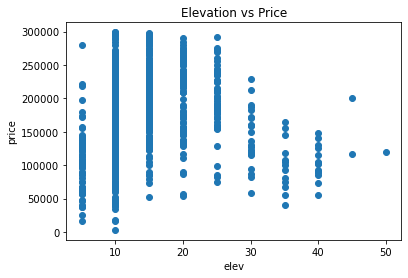

In [22]:
#generating scatter plot to view relationship between elevation and price
plt.scatter(df['elev'], df['price'], marker='o')
plt.xlabel('elev')
plt.ylabel('price')
plt.title("Elevation vs Price")
plt.show()

In [23]:
#training the model to include fzdistance, elev, and price
xColumns = ['fzdistance','elev','aprland','aprbldg']
x = pd.DataFrame(np.c_[df['fzdistance'], df['elev'], df['aprland'], df['aprbldg']], columns= xColumns)
y = df['price']
x_train, x_test, Y_train, Y_test =  train_test_split(x, y, test_size = 0.3, random_state=5)

model = LinearRegression()
model.fit(x_train, Y_train)

LinearRegression()

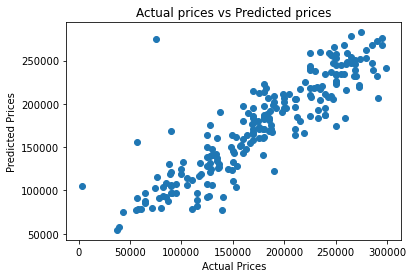

DIFFERENCES FROM ZILLOW PRICES
For parid 4811435.0:  9.7 %
For parid 3446445.0:  7.4 %
For parid 3248694.0:  22.12 %
For parid 3381211.0:  20.14 %
For parid 3096045.0:  33.56 %


In [24]:
#creating the model and displaying difference with zillow price
price_pred = model.predict(x_test)
plt.scatter(Y_test, price_pred, marker='o')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title("Actual prices vs Predicted prices")
plt.show()

zillowDiff(df, model, xColumns)

In [25]:
#recalcualting the R-squared and error value with flood zone + elevation attribute
print('R-squared: %.4f'%model.score(x_test, Y_test))
mse = mean_squared_error(Y_test, price_pred)
print(mse, np.round(np.sqrt(mse),1))
print('Build your price = B0 + B1X1 + B2X2 +...')
print(model.intercept_)
print(model.coef_)

#elevation seemed to lower the R-Squared value

R-squared: 0.7807
958417930.7247435 30958.3
Build your price = B0 + B1X1 + B2X2 +...
402656.85107539734
[-1.04642560e+03  2.77685910e+01  1.16887217e+00  8.94355284e-01]


In [26]:
#adding Tim Elvira's attribute: Schoolzones
sql3  = "".join([
    "select sa.parid, sa.luc, sa.luc_desc, ",
    "sa.aprland, sa.aprbldg, sa.aprtot, ",
    "sa.price, ",
    "sa.fzdistance, sa.fzid, ",
    "ca.elev, ",
    "sz.distance_to_elem_school, sz.distance_to_middle_school, sz.distance_to_high_school, ",
    "sz.nearest_elem_school, sz.nearest_middle_school, sz.nearest_high_school ",
    "from volusia.sales_analysis sa, volusia.contours_analysis2 ca, volusia.schoolzones sz where ",
    "rmbed=3 and ",
    "luc_desc ilike 'Single Family' and ",
#used Daytona Beach and Daytona Beach Shores zip code 
    "(zip1 ilike'32114' or zip1 ilike '32118') and ",
    "sa.geom is not null and ",
    "sa.rmbed is not null and ",
    "sa.price<300000 and ",
    "sa.parid = ca.parid and sa.parid = sz.parid"
    ";"
    ]);

df = pd.read_sql_query(sql3, conn)

In [27]:
#refinding the correlations to price with included database attribute
corr = df.corr()
print(corr)

print (df.corr().abs().nlargest(4, 'price').index)

                              parid   aprland   aprbldg    aprtot     price  \
parid                      1.000000 -0.023114  0.246126  0.177048  0.142698   
aprland                   -0.023114  1.000000  0.428717  0.729286  0.690029   
aprbldg                    0.246126  0.428717  1.000000  0.930798  0.793198   
aprtot                     0.177048  0.729286  0.930798  1.000000  0.879907   
price                      0.142698  0.690029  0.793198  0.879907  1.000000   
fzdistance                -0.357647  0.284897  0.028756  0.137048  0.119545   
elev                       0.050490  0.058710  0.097651  0.097709  0.079585   
distance_to_elem_school   -0.124840  0.038228 -0.179348 -0.120360 -0.115056   
distance_to_middle_school -0.069584  0.571235  0.417000  0.546933  0.509949   
distance_to_high_school    0.271428  0.448809  0.122932  0.274690  0.287515   

                           fzdistance      elev  distance_to_elem_school  \
parid                       -0.357647  0.050490       

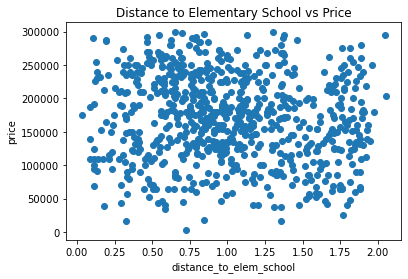

In [28]:
#generating scatter plot to view relationship between distance_to_elem_school and price
plt.scatter(df['distance_to_elem_school'], df['price'], marker='o')
plt.xlabel('distance_to_elem_school')
plt.ylabel('price')
plt.title("Distance to Elementary School vs Price")
plt.show()

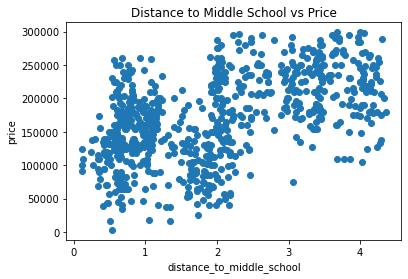

In [29]:
#generating scatter plot to view relationship between distance_to_middle_school and price
plt.scatter(df['distance_to_middle_school'], df['price'], marker='o')
plt.xlabel('distance_to_middle_school')
plt.ylabel('price')
plt.title("Distance to Middle School vs Price")
plt.show()

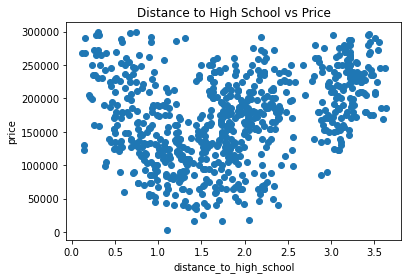

In [30]:
#generating scatter plot to view relationship between distance_to_high_school and price
plt.scatter(df['distance_to_high_school'], df['price'], marker='o')
plt.xlabel('distance_to_high_school')
plt.ylabel('price')
plt.title("Distance to High School vs Price")
plt.show()

In [31]:
#training the model to include fzdistance, elev, all 3 type distances to schools, and price
xColumns = ['fzdistance','elev','distance_to_elem_school','distance_to_middle_school','distance_to_high_school','aprland','aprbldg']
x = pd.DataFrame(np.c_[df['fzdistance'], df['elev'], df['distance_to_elem_school'], df['distance_to_middle_school'], df['distance_to_high_school'], df['aprland'], df['aprbldg']], columns= xColumns)
y = df['price']
x_train, x_test, Y_train, Y_test =  train_test_split(x, y, test_size = 0.3, random_state=5)

model = LinearRegression()
model.fit(x_train, Y_train)

LinearRegression()

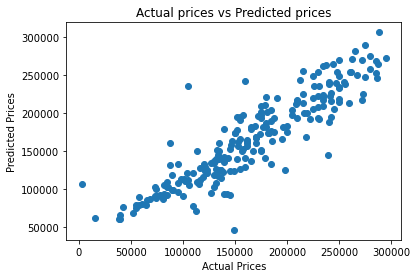

DIFFERENCES FROM ZILLOW PRICES
For parid 4811435.0:  7.58 %
For parid 3446445.0:  10.43 %
For parid 3248694.0:  19.39 %
For parid 3381211.0:  21.23 %
For parid 3096045.0:  31.66 %


In [32]:
#creating the model and displaying difference with zillow price
price_pred = model.predict(x_test)
plt.scatter(Y_test, price_pred, marker='o')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title("Actual prices vs Predicted prices")
plt.show()

zillowDiff(df, model, xColumns)

In [33]:
#recalcualting the R-squared and error value with flood zone + elevation + school zone attribute
print('R-squared: %.4f'%model.score(x_test, Y_test))
mse = mean_squared_error(Y_test, price_pred)
print(mse, np.round(np.sqrt(mse),1))
print('Build your price = B0 + B1X1 + B2X2 +...')
print(model.intercept_)
print(model.coef_)

#school zone seemed to increase the R-Squared value

R-squared: 0.8132
771779899.5463135 27780.9
Build your price = B0 + B1X1 + B2X2 +...
1000776.4730231157
[-2.70141228e+03 -2.06647912e+02 -3.88943597e+03  4.50079510e+03
 -2.08004868e+03  1.19084478e+00  8.53583637e-01]


In [34]:
#adding Matthew Getter's attribute: FCCDistance
sql4  = "".join([
    "select sa.parid, sa.luc, sa.luc_desc, ",
    "sa.aprland, sa.aprbldg, sa.aprtot, ",
    "sa.price, ",
    "sa.fzdistance, sa.fzid, ",
    "ca.elev, ",
    "sz.distance_to_elem_school, sz.distance_to_middle_school, sz.distance_to_high_school, ",
    "sz.nearest_elem_school, sz.nearest_middle_school, sz.nearest_high_school, ",
    "p.fccdistance ",
    "from volusia.sales_analysis sa, volusia.contours_analysis2 ca, volusia.schoolzones sz, volusia.parcel p where ",
    "sa.rmbed=3 and ",
    "sa.luc_desc ilike 'Single Family' and ",
#used Daytona Beach and Daytona Beach Shores zip code 
    "(zip1 ilike'32114' or zip1 ilike '32118') and ",
    "sa.geom is not null and ",
    "sa.rmbed is not null and ",
    "sa.price<300000 and ",
    "sa.parid = ca.parid and sa.parid = sz.parid and sa.parid = p.parid"
    ";"
    ]);

df = pd.read_sql_query(sql4, conn)

In [35]:
#refinding the correlations to price with included database attribute
corr = df.corr()
print(corr)

print (df.corr().abs().nlargest(4, 'price').index)

                              parid   aprland   aprbldg    aprtot     price  \
parid                      1.000000 -0.023114  0.246126  0.177048  0.142698   
aprland                   -0.023114  1.000000  0.428717  0.729286  0.690029   
aprbldg                    0.246126  0.428717  1.000000  0.930798  0.793198   
aprtot                     0.177048  0.729286  0.930798  1.000000  0.879907   
price                      0.142698  0.690029  0.793198  0.879907  1.000000   
fzdistance                -0.357647  0.284897  0.028756  0.137048  0.119545   
elev                       0.050490  0.058710  0.097651  0.097709  0.079585   
distance_to_elem_school   -0.124840  0.038228 -0.179348 -0.120360 -0.115056   
distance_to_middle_school -0.069584  0.571235  0.417000  0.546933  0.509949   
distance_to_high_school    0.271428  0.448809  0.122932  0.274690  0.287515   
fccdistance                0.071967 -0.138025 -0.112728 -0.141219 -0.130543   

                           fzdistance      elev  di

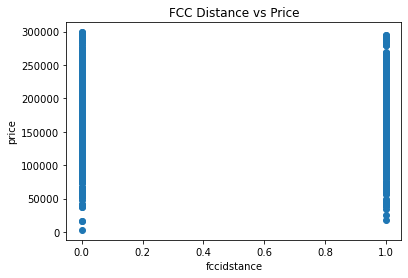

In [43]:
#generating scatter plot to view relationship between fccdistance and price
plt.scatter(df['fccdistance'], df['price'], marker='o')
plt.xlabel('fccidstance')
plt.ylabel('price')
plt.title("FCC Distance vs Price")
plt.show()

In [37]:
#training the model to include fzdistance, elev, all 3 type distances to schools, fccdistance, and price
xColumns = ['fzdistance','elev','distance_to_elem_school','distance_to_middle_school','distance_to_high_school','fccdistance','aprland','aprbldg']
x = pd.DataFrame(np.c_[df['fzdistance'], df['elev'], df['distance_to_elem_school'], df['distance_to_middle_school'], df['distance_to_high_school'], df['fccdistance'], df['aprland'], df['aprbldg']], columns= xColumns)
y = df['price']
x_train, x_test, Y_train, Y_test =  train_test_split(x, y, test_size = 0.3, random_state=5)

model = LinearRegression()
model.fit(x_train, Y_train)

LinearRegression()

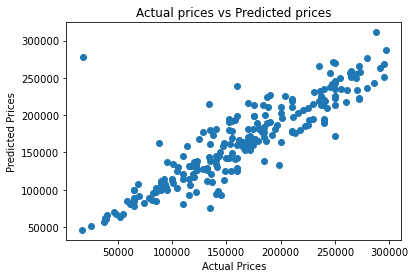

DIFFERENCES FROM ZILLOW PRICES
For parid 4811435.0:  9.17 %
For parid 3446445.0:  11.89 %
For parid 3248694.0:  21.38 %
For parid 3381211.0:  19.48 %
For parid 3096045.0:  33.57 %


In [38]:
#creating the model and displaying difference with zillow price
price_pred = model.predict(x_test)
plt.scatter(Y_test, price_pred, marker='o')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title("Actual prices vs Predicted prices")
plt.show()

zillowDiff(df, model, xColumns)

In [39]:
#recalcualting the R-squared and error value with flood zone + elevation + school zone + fccdistance attribute
print('R-squared: %.4f'%model.score(x_test, Y_test))
mse = mean_squared_error(Y_test, price_pred)
print(mse, np.round(np.sqrt(mse),1))
print('Build your price = B0 + B1X1 + B2X2 +...')
print(model.intercept_)
print(model.coef_)

#fccdistance seemed to lower the R-Squared value marginally worse

R-squared: 0.7755
988737368.3390766 31444.2
Build your price = B0 + B1X1 + B2X2 +...
267320.0819566591
[-6.58446909e+02 -2.59305468e+02 -3.40348583e+03  2.01458149e+03
  1.98946859e+03 -4.39230334e+02  1.05267741e+00  9.08369781e-01]


In [41]:
#adding Ross' attribute: Airport distance
sql5  = "".join([
    "select sa.parid, sa.luc, sa.luc_desc, ",
    "sa.aprland, sa.aprbldg, sa.aprtot, ",
    "sa.price, ",
    "sa.fzdistance, sa.fzid, ",
    "ca.elev, ",
    "sz.distance_to_elem_school, sz.distance_to_middle_school, sz.distance_to_high_school, ",
    "sz.nearest_elem_school, sz.nearest_middle_school, sz.nearest_high_school, ",
    "p.fccdistance, ",
    "ad.airport_distance ",
    "from volusia.sales_analysis sa, volusia.contours_analysis2 ca, volusia.schoolzones sz, volusia.parcel p, volusia.nearby_airport ad where ",
    "sa.rmbed=3 and ",
    "sa.luc_desc ilike 'Single Family' and ",
#used Daytona Beach and Daytona Beach Shores zip code 
    "(zip1 ilike'32114' or zip1 ilike '32118') and ",
    "sa.geom is not null and ",
    "sa.rmbed is not null and ",
    "sa.price<300000 and ",
    "sa.parid = ca.parid and sa.parid = sz.parid and sa.parid = p.parid and sa.parid = ad.parid"
    ";"
    ]);

df = pd.read_sql_query(sql5, conn)

In [42]:
#refinding the correlations to price with included database attribute
corr = df.corr()
print(corr)

print (df.corr().abs().nlargest(4, 'price').index)

                              parid   aprland   aprbldg    aprtot     price  \
parid                      1.000000 -0.023114  0.246126  0.177048  0.142698   
aprland                   -0.023114  1.000000  0.428717  0.729286  0.690029   
aprbldg                    0.246126  0.428717  1.000000  0.930798  0.793198   
aprtot                     0.177048  0.729286  0.930798  1.000000  0.879907   
price                      0.142698  0.690029  0.793198  0.879907  1.000000   
fzdistance                -0.357647  0.284897  0.028756  0.137048  0.119545   
elev                       0.050490  0.058710  0.097651  0.097709  0.079585   
distance_to_elem_school   -0.124840  0.038228 -0.179348 -0.120360 -0.115056   
distance_to_middle_school -0.069584  0.571235  0.417000  0.546933  0.509949   
distance_to_high_school    0.271428  0.448809  0.122932  0.274690  0.287515   
fccdistance                0.071967 -0.138025 -0.112728 -0.141219 -0.130543   
airport_distance           0.047633  0.223882  0.549

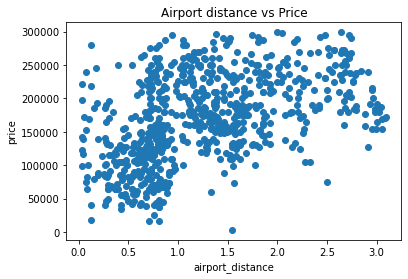

In [50]:
#generating scatter plot to view relationship between airport_distance and price
plt.scatter(df['airport_distance'], df['price'], marker='o')
plt.xlabel('airport_distance')
plt.ylabel('price')
plt.title("Airport distance vs Price")
plt.show()

In [45]:
#training the model to include fzdistance, elev, all 3 type distances to schools, fccdistance, airport_distance, and price
xColumns = ['fzdistance','elev','distance_to_elem_school','distance_to_middle_school','distance_to_high_school','fccdistance','airport_distance','aprland','aprbldg']
x = pd.DataFrame(np.c_[df['fzdistance'], df['elev'], df['distance_to_elem_school'], df['distance_to_middle_school'], df['distance_to_high_school'], df['fccdistance'], df['airport_distance'], df['aprland'], df['aprbldg']], columns= xColumns)
y = df['price']
x_train, x_test, Y_train, Y_test =  train_test_split(x, y, test_size = 0.3, random_state=5)

model = LinearRegression()
model.fit(x_train, Y_train)

LinearRegression()

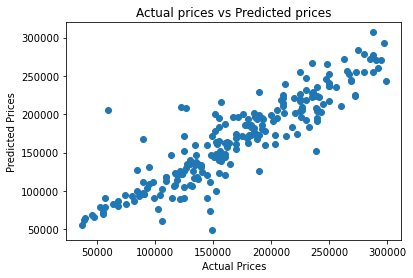

DIFFERENCES FROM ZILLOW PRICES
For parid 4811435.0:  7.66 %
For parid 3446445.0:  6.91 %
For parid 3248694.0:  19.5 %
For parid 3381211.0:  18.27 %
For parid 3096045.0:  31.11 %


In [46]:
#creating the model and displaying difference with zillow price
price_pred = model.predict(x_test)
plt.scatter(Y_test, price_pred, marker='o')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title("Actual prices vs Predicted prices")
plt.show()

zillowDiff(df, model, xColumns)

In [47]:
#recalcualting the R-squared and error value with flood zone + elevation + school zone + fccdistance + airport_distance attribute
print('R-squared: %.4f'%model.score(x_test, Y_test))
mse = mean_squared_error(Y_test, price_pred)
print(mse, np.round(np.sqrt(mse),1))
print('Build your price = B0 + B1X1 + B2X2 +...')
print(model.intercept_)
print(model.coef_)

#airport_distance seemed to increase the R-Squared value marginally worse

R-squared: 0.8031
775325254.2426423 27844.7
Build your price = B0 + B1X1 + B2X2 +...
-274488.31596151396
[ 8.41850721e+02 -1.17290584e+01 -3.77689348e+03 -1.06081785e+03
  4.20514436e+03 -6.12288203e+02  7.77086353e+03  1.16534688e+00
  8.24356237e-01]


In [48]:
#adding Kody Miller's attribute: Boat and Marina ramp distance
sql6  = "".join([
    "select sa.parid, sa.luc, sa.luc_desc, ",
    "sa.aprland, sa.aprbldg, sa.aprtot, ",
    "sa.price, ",
    "sa.fzdistance, sa.fzid, ",
    "ca.elev, ",
    "sz.distance_to_elem_school, sz.distance_to_middle_school, sz.distance_to_high_school, ",
    "sz.nearest_elem_school, sz.nearest_middle_school, sz.nearest_high_school, ",
    "p.fccdistance, ",
    "ad.airport_distance, ",
    "bd.mar_distance, bd.br_distance ",
    "from volusia.sales_analysis sa, volusia.contours_analysis2 ca, volusia.schoolzones sz, volusia.parcel p, volusia.nearby_airport ad, volusia.boat_marina_ramp_distance bd where ",
    "sa.rmbed=3 and ",
    "sa.luc_desc ilike 'Single Family' and ",
#used Daytona Beach and Daytona Beach Shores zip code 
    "(zip1 ilike'32114' or zip1 ilike '32118') and ",
    "sa.geom is not null and ",
    "sa.rmbed is not null and ",
    "sa.price<300000 and ",
    "sa.parid = ca.parid and sa.parid = sz.parid and sa.parid = p.parid and sa.parid = ad.parid and sa.parid = bd.parid"
    ";"
    ]);

df = pd.read_sql_query(sql6, conn)

In [49]:
#refinding the correlations to price with included database attribute
corr = df.corr()
print(corr)

print (df.corr().abs().nlargest(4, 'price').index)

                              parid   aprland   aprbldg    aprtot     price  \
parid                      1.000000 -0.023114  0.246126  0.177048  0.142698   
aprland                   -0.023114  1.000000  0.428717  0.729286  0.690029   
aprbldg                    0.246126  0.428717  1.000000  0.930798  0.793198   
aprtot                     0.177048  0.729286  0.930798  1.000000  0.879907   
price                      0.142698  0.690029  0.793198  0.879907  1.000000   
fzdistance                -0.357647  0.284897  0.028756  0.137048  0.119545   
elev                       0.050490  0.058710  0.097651  0.097709  0.079585   
distance_to_elem_school   -0.124840  0.038228 -0.179348 -0.120360 -0.115056   
distance_to_middle_school -0.069584  0.571235  0.417000  0.546933  0.509949   
distance_to_high_school    0.271428  0.448809  0.122932  0.274690  0.287515   
fccdistance                0.071967 -0.138025 -0.112728 -0.141219 -0.130543   
airport_distance           0.047633  0.223882  0.549

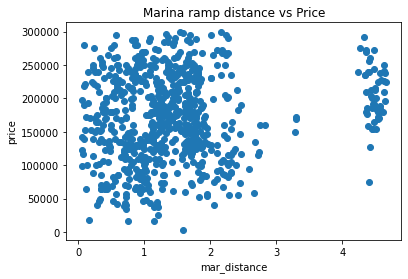

In [51]:
#generating scatter plot to view relationship between mar_distance and price
plt.scatter(df['mar_distance'], df['price'], marker='o')
plt.xlabel('mar_distance')
plt.ylabel('price')
plt.title("Marina ramp distance vs Price")
plt.show()

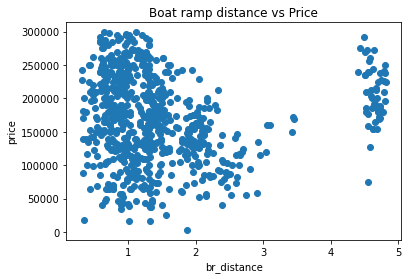

In [52]:
#generating scatter plot to view relationship between br_distance and price
plt.scatter(df['br_distance'], df['price'], marker='o')
plt.xlabel('br_distance')
plt.ylabel('price')
plt.title("Boat ramp distance vs Price")
plt.show()

In [53]:
#training the model to include fzdistance, elev, all 3 type distances to schools, fccdistance, airport_distance, br_distance, mar_distance and price
xColumns = ['fzdistance','elev','distance_to_elem_school','distance_to_middle_school','distance_to_high_school','fccdistance','airport_distance','mar_distance','br_distance','aprland','aprbldg']
x = pd.DataFrame(np.c_[df['fzdistance'], df['elev'], df['distance_to_elem_school'], df['distance_to_middle_school'], df['distance_to_high_school'], df['fccdistance'], df['airport_distance'], df['br_distance'], df['mar_distance'], df['aprland'], df['aprbldg']], columns= xColumns)
y = df['price']
x_train, x_test, Y_train, Y_test =  train_test_split(x, y, test_size = 0.3, random_state=5)

model = LinearRegression()
model.fit(x_train, Y_train)

LinearRegression()

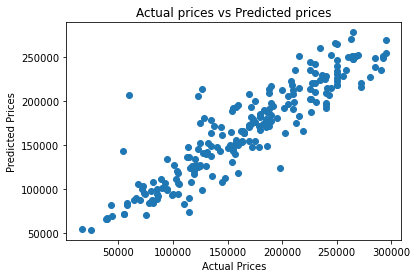

DIFFERENCES FROM ZILLOW PRICES
For parid 4811435.0:  10.84 %
For parid 3446445.0:  0.66 %
For parid 3248694.0:  20.69 %
For parid 3381211.0:  18.56 %
For parid 3096045.0:  30.53 %


In [54]:
#creating the model and displaying difference with zillow price
price_pred = model.predict(x_test)
plt.scatter(Y_test, price_pred, marker='o')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title("Actual prices vs Predicted prices")
plt.show()

zillowDiff(df, model, xColumns)

In [55]:
#recalcualting the R-squared and error value with flood zone + elevation + school zone + fccdistance + airport_distance attribute
print('R-squared: %.4f'%model.score(x_test, Y_test))
mse = mean_squared_error(Y_test, price_pred)
print(mse, np.round(np.sqrt(mse),1))
print('Build your price = B0 + B1X1 + B2X2 +...')
print(model.intercept_)
print(model.coef_)

#mar_distance and br_distance seemed to increase the R-Squared value marginally worse

R-squared: 0.8313
729817966.4516345 27015.1
Build your price = B0 + B1X1 + B2X2 +...
689965.9482870838
[-1.83118127e+03  1.21178770e+02 -1.72060010e+03  8.07909466e+02
  1.16466543e+03 -8.54022758e+02  1.16461244e+04 -2.81210919e+03
 -4.22090319e+03  1.07156775e+00  8.06826840e-01]


In [59]:
pd.set_option('display.max_colwidth', None)

zillowParcels = df[df['parid'].isin(zillowPIDs)]

zillowParcels['parid_link'] = zillowParcels.apply(lambda row: 'https://vcpa.vcgov.org/parcel/summary/?altkey=' + str(int(row.parid)) + '#gsc.tab=0', axis=1)

zillowParcels['parid_map'] = zillowParcels.apply(lambda row: 'https://vcpa.vcgov.org/parcel/map/?altkey=' + str(int(row.parid)) + '#gsc.tab=0', axis=1)

zillowParcels

,parid,luc,luc_desc,aprland,aprbldg,aprtot,price,fzdistance,fzid,elev,...,distance_to_high_school,nearest_elem_school,nearest_middle_school,nearest_high_school,fccdistance,airport_distance,mar_distance,br_distance,parid_link,parid_map
155,4811435.0,0100,Single Family,35000.0,161959.0,196959.0,241200.0,354.824737,AE,25,...,2.452497,PALM TERRACE ELEMENTARY SCHOOL,DAVID C HINSON SR MIDDLE SCHOOL,MAINLAND HIGH SCHOOL,0.0,2.846896,4.622426,4.786021,https://vcpa.vcgov.org/parcel/summary/?altkey=4811435#gsc.tab=0,https://vcpa.vcgov.org/parcel/map/?altkey=4811435#gsc.tab=0
617,3446445.0,0100,Single Family,16875.0,112678.0,129553.0,165000.0,354.859650,AE,35,...,1.823262,TURIE T SMALL ELEMENTARY SCHOOL,CAMPBELL MIDDLE SCHOOL,MAINLAND HIGH SCHOOL,1.0,2.293776,2.331922,2.206455,https://vcpa.vcgov.org/parcel/summary/?altkey=3446445#gsc.tab=0,https://vcpa.vcgov.org/parcel/map/?altkey=3446445#gsc.tab=0
669,3248694.0,0100,Single Family,20000.0,133572.0,153572.0,128000.0,354.515893,AE,25,...,2.249895,PALM TERRACE ELEMENTARY SCHOOL,CAMPBELL MIDDLE SCHOOL,MAINLAND HIGH SCHOOL,0.0,2.915189,4.412842,4.585844,https://vcpa.vcgov.org/parcel/summary/?altkey=3248694#gsc.tab=0,https://vcpa.vcgov.org/parcel/map/?altkey=3248694#gsc.tab=0
739,3381211.0,0100,Single Family,37575.0,58431.0,96006.0,85000.0,358.804303,AE,15,...,2.879443,ORTONA ELEMENTARY SCHOOL,CAMPBELL MIDDLE SCHOOL,SEABREEZE HIGH SCHOOL,1.0,0.548894,0.600788,0.580982,https://vcpa.vcgov.org/parcel/summary/?altkey=3381211#gsc.tab=0,https://vcpa.vcgov.org/parcel/map/?altkey=3381211#gsc.tab=0
742,3096045.0,0100,Single Family,54675.0,122347.0,177022.0,205000.0,360.854255,AE,10,...,0.195820,ORTONA ELEMENTARY SCHOOL,ORMOND BEACH MIDDLE SCHOOL,SEABREEZE HIGH SCHOOL,1.0,2.693152,2.223884,1.215266,https://vcpa.vcgov.org/parcel/summary/?altkey=3096045#gsc.tab=0,https://vcpa.vcgov.org/parcel/map/?altkey=3096045#gsc.tab=0
